In [0]:
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
import random
from random import randint

In [3]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv("iris.csv", names=names)
print(data.head(150))

     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [4]:
data.drop('class', axis = 1, inplace = True)
data.drop('petal-width', axis = 1, inplace = True)
data.drop('sepal-length', axis = 1, inplace = True)
data.drop('sepal-width', axis = 1, inplace = True)
print(data.head(150))

     petal-length
0             1.4
1             1.4
2             1.3
3             1.5
4             1.4
..            ...
145           5.2
146           5.0
147           5.2
148           5.4
149           5.1

[150 rows x 1 columns]


In [5]:
X = data.iloc[:, 0]
X = list(X)
X.sort()
print(X)

[1.0, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3.0, 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6.0, 6.0, 6.1, 6.1, 6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9]


Histogram Analysis - Equal Width

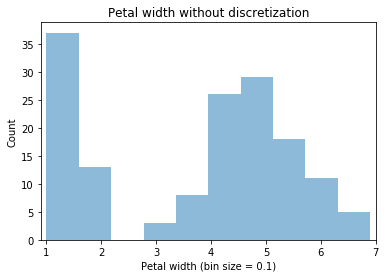

In [6]:
#Initial histogram
bins = 10 # fixed bin size

data = np.asarray(X)

plt.xlim([min(X)-0.1, max(X)+0.1])
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Petal width without discretization')
plt.xlabel('Petal width (bin size = 0.1)')
plt.ylabel('Count')

plt.show()

1.0
6.9
1.9666666666666668


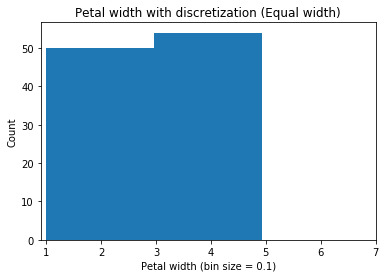

In [11]:
#Number of bins
k = 3

#Width of each bin
w = (max(X) - min(X))/k

init = min(X)
print(init)
print(max(X))
print(w)

discretized = []

for i in range(k):
  discretized.append(init)
  init += w

data = np.asarray(X)

plt.xlim([min(X)-0.1, max(X)+0.1])
plt.hist(data, bins=discretized)
plt.title('Petal width with discretization (Equal width)')
plt.xlabel('Petal width (bin size = 0.1)')
plt.ylabel('Count')

plt.show()

Histogram Analysis - Equal frequency

50
100
150
3


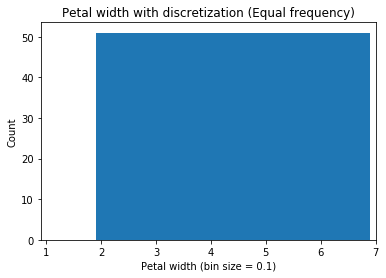

In [10]:
#Number of bins
k = 3

#Width of each bin
freq = len(X)//k

discretized = []
init = 0
i = 0

while (init + freq <= 150 and i < 10):
  init += freq
  print(init)
  i += 1
  discretized.append(X[init - 1])

print(len(discretized))

data = np.asarray(X)

plt.xlim([min(X)-0.1, max(X)+0.1])
plt.hist(data, bins=discretized)
plt.title('Petal width with discretization (Equal frequency)')
plt.xlabel('Petal width (bin size = 0.1)')
plt.ylabel('Count')

plt.show()